In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")

In [2]:
csrTF = True


bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"],
    
    csrTF = csrTF,
    numMacroParticles=1e5,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
launchTwissCorrection(tao)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 100000.0
Beam created, written to /tmp/beams/activeBeamFile_6454929527815654415.h5, and reinit to tao
No evalElement provided. Assuming golden lattice PR10571
Optimization Results:
Optimal Parameters: [28.77872199 13.3970811  23.51278494 16.8307956 ]
Objective Function Value at Optimal Parameters: 9.505958617749993e-12
Number of Iterations: 260
Converged: True


In [3]:
trackStart = "ENDBC14E"
trackEnd = "PR15944"

trackBeam(tao, trackEnd = trackStart, **importedDefaultSettings)
PStart = getBeamAtElement(tao, trackStart)


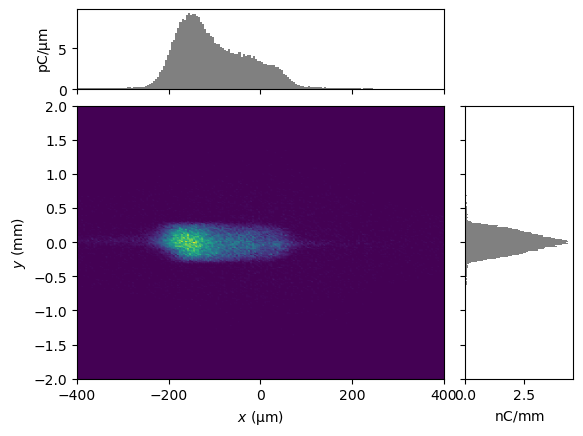

<Figure size 640x480 with 0 Axes>

In [4]:
trackBeam(tao, 
          trackEnd = trackEnd, 
          **importedDefaultSettings
         )

P = getBeamAtElement(tao, trackEnd)
display(plotMod(P, 'x', 'y', bins=300, xlim = (-0.4e-3, 0.4e-3), ylim = (-2e-3,2e-3)))
plt.clf()

getBeamSpecs(P)

P.write("/tmp/PR15944_CSRon.h5")

In [5]:
data = []
quadStep = 2
allQuadSettings = np.arange(-60, 0 + quadStep, quadStep)

for quadSetting in allQuadSettings:
    setQuadkG(tao, "Q14901", quadSetting)


    transferMatrix = getMatrix(tao, trackStart, trackEnd)

    trackBeam(tao, trackEnd = trackEnd, **importedDefaultSettings)

    P = getBeamAtElement(tao, trackEnd)
    
    spotSize = smallestIntervalImpliedSigma(P.x)
    #spotSize = P["sigma_x"]

    data.append(
        {
            "quadSetting" : quadSetting,
            "R11" : transferMatrix[0][0],
            "R12" : transferMatrix[0][1],
            "sigma" : spotSize,
            "beam" : P
        }
    )

In [6]:
generalizedEmittanceSolver( data, energyGeV = 4.5 )

{'beta': 10.541153461242047,
 'alpha': 0.6585810119423499,
 'emitGeo': 9.696944831876938e-10,
 'emit': 8.53938390282705e-06}

In [7]:
PStart.twiss()#(fraction = 0.95)

{'alpha_x': 0.638542431870096,
 'beta_x': 7.921868135985318,
 'gamma_x': 0.17770258392763347,
 'emit_x': 1.5642629647117013e-09,
 'eta_x': -0.0028382962851388137,
 'etap_x': 1.8116729851721303e-05,
 'norm_emit_x': 1.3568274711463651e-05}

In [8]:
smallestIntervalImpliedEmittance(PStart)

6.908828106038681e-06

In [9]:
PStart.twiss(fraction = 0.9)

{'alpha_x': 0.6770582099955449,
 'beta_x': 8.832923920319594,
 'gamma_x': 0.16511042468818218,
 'emit_x': 3.6224903537822953e-10,
 'eta_x': -0.002298996502311934,
 'etap_x': -1.1652960085016344e-05,
 'norm_emit_x': 3.1416121779761726e-06}

## Comparing different methods of spot size calculation

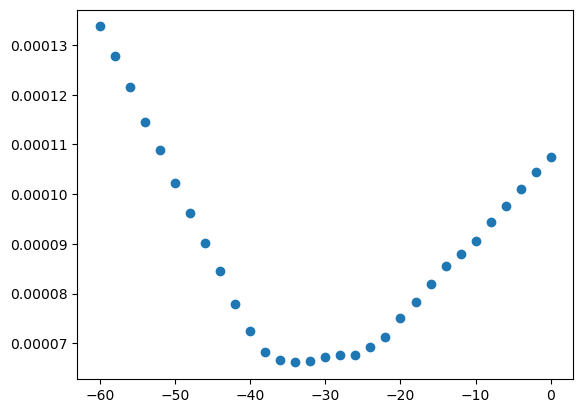

In [10]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [smallestIntervalImpliedSigma(i["beam"]["x"]) for i in data]
)
    

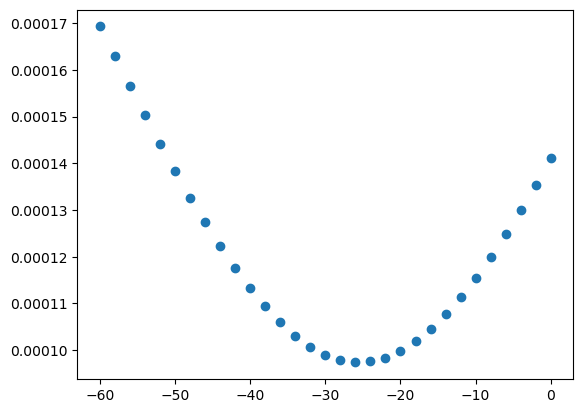

In [11]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [(i["beam"])["sigma_x"] for i in data]
)

In [12]:
def spotFromTwiss(P, fraction = 1):
    twiss = P.twiss(fraction = fraction)
    return np.sqrt(  twiss['beta_x'] * twiss['emit_x'] )

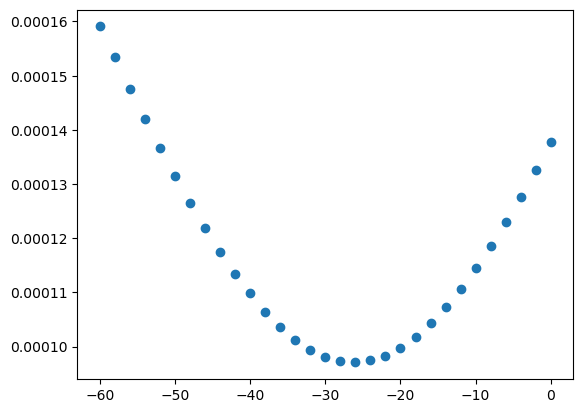

In [13]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [spotFromTwiss(i["beam"]) for i in data]
)

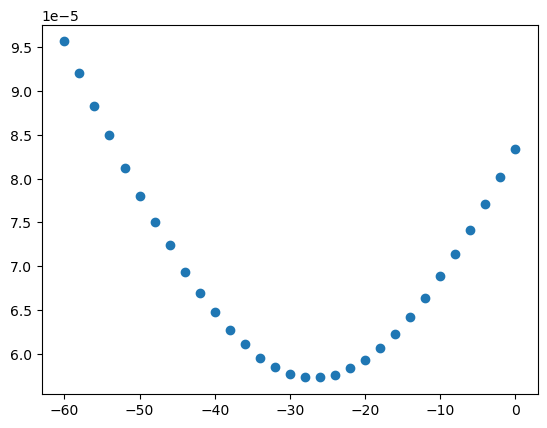

In [14]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [spotFromTwiss(i["beam"], fraction = 0.95) for i in data]
)

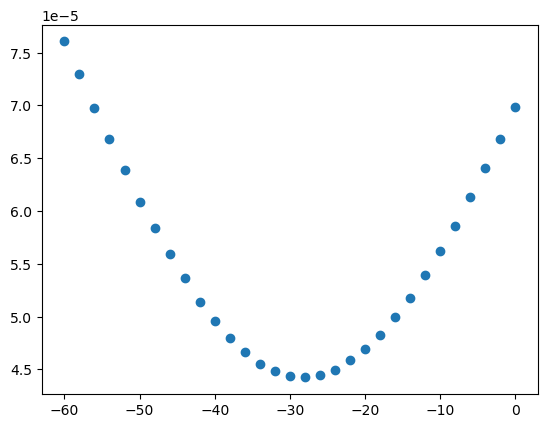

In [15]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [spotFromTwiss(i["beam"], fraction = 0.90) for i in data]
)

## Emittance results

In [16]:
dataTmp = data.copy()

for row in dataTmp:
    row["sigma"] = smallestIntervalImpliedSigma(row["beam"]["x"])

generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

{'beta': 10.541153461242047,
 'alpha': 0.6585810119423499,
 'emitGeo': 9.696944831876938e-10,
 'emit': 8.53938390282705e-06}

In [17]:
smallestIntervalImpliedEmittance( PStart ) 

6.908828106038681e-06

In [18]:
dataTmp = data.copy()

for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 1.0)

generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

{'beta': 0.8051564333646615,
 'alpha': 0.45858669985245487,
 'emitGeo': 1.9665267468229943e-10,
 'emit': 1.731775021664085e-06}

In [19]:
PStart.twiss(fraction = 1.0)

{'alpha_x': 0.638542431870096,
 'beta_x': 7.921868135985318,
 'gamma_x': 0.17770258392763347,
 'emit_x': 1.5642629647117013e-09,
 'eta_x': -0.0028382962851388137,
 'etap_x': 1.8116729851721303e-05,
 'norm_emit_x': 1.3568274711463651e-05}

In [20]:
dataTmp = data.copy()

for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 0.95)

generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

{'beta': 0.8600247532615564,
 'alpha': 0.449609905356787,
 'emitGeo': 7.52000395527702e-11,
 'emit': 6.622312680772327e-07}

In [21]:
PStart.twiss(fraction = 0.95)

{'alpha_x': 0.6192934622265367,
 'beta_x': 8.043970682766131,
 'gamma_x': 0.17199520571608667,
 'emit_x': 5.513978962676961e-10,
 'eta_x': -0.0026901827142777955,
 'etap_x': 2.5431318912989987e-05,
 'norm_emit_x': 4.7828829208199654e-06}

In [22]:
dataTmp = data.copy()

for row in dataTmp:
    row["sigma"] = spotFromTwiss(row["beam"], fraction = 0.9)

generalizedEmittanceSolver( dataTmp, energyGeV = 4.5 )

{'beta': 0.8680980595742368,
 'alpha': 0.44308344408008005,
 'emitGeo': 4.761771007910809e-11,
 'emit': 4.19334041792537e-07}

In [23]:
PStart.twiss(fraction = 0.9)

{'alpha_x': 0.6770582099955449,
 'beta_x': 8.832923920319594,
 'gamma_x': 0.16511042468818218,
 'emit_x': 3.6224903537822953e-10,
 'eta_x': -0.002298996502311934,
 'etap_x': -1.1652960085016344e-05,
 'norm_emit_x': 3.1416121779761726e-06}

## Gaussian fit the data to get the sigmas

This is the closest to how we do it on the machine

In [24]:
#Blob of code from ChatGPT

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma, offset):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2) + offset

def fit_gaussian_to_binned_data(data, bin_size, plot=False):
    # Bin the data
    min_val, max_val = min(data), max(data)
    bins = np.arange(min_val, max_val + bin_size, bin_size)
    hist, bin_edges = np.histogram(data, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Initial guesses for the fit
    A_guess = max(hist)
    mu_guess = np.mean(data)
    sigma_guess = np.std(data)
    offset_guess = min(hist)
    p0 = [A_guess, mu_guess, sigma_guess, offset_guess]
    
    # Fit the Gaussian
    try:
        popt, _ = curve_fit(gaussian, bin_centers, hist, p0=p0)
    except RuntimeError:
        raise RuntimeError("Gaussian fit failed")
    
    # Extract fitted parameters
    _, _, sigma_fitted, _ = popt
    
    if plot:
        plt.bar(bin_centers, hist, width=bin_size * 0.9, alpha=0.6, label='Binned Data')
        x_fit = np.linspace(min_val, max_val, 500)
        y_fit = gaussian(x_fit, *popt)
        plt.plot(x_fit, y_fit, 'r-', label='Gaussian Fit')
        plt.legend()
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.show()
    
    return sigma_fitted

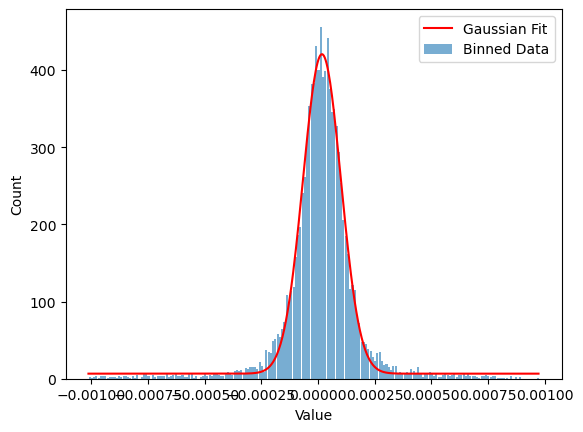

8.378481954646399e-05

In [25]:
fit_gaussian_to_binned_data( data[0]["beam"]["x"], 10e-6, plot = True )

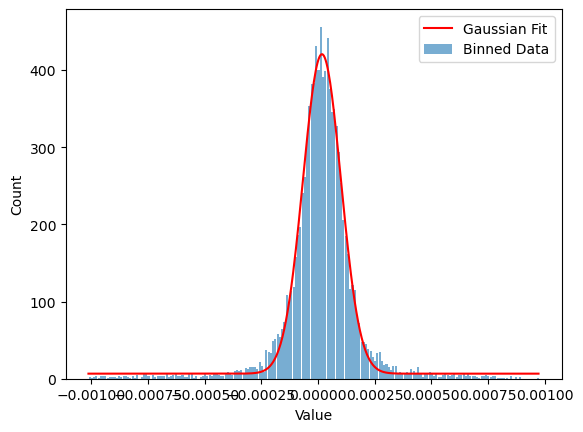

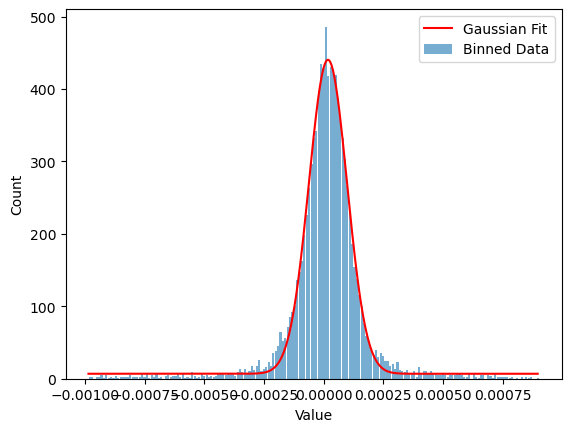

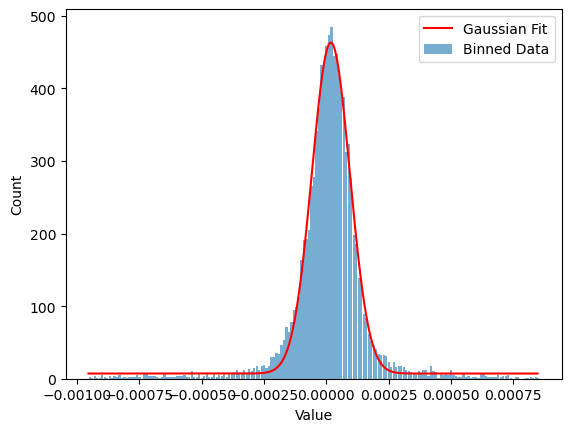

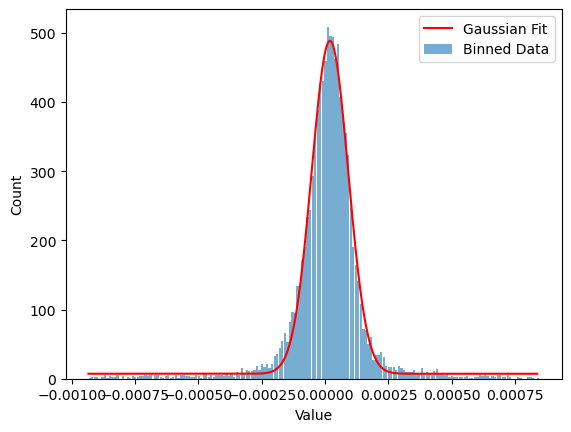

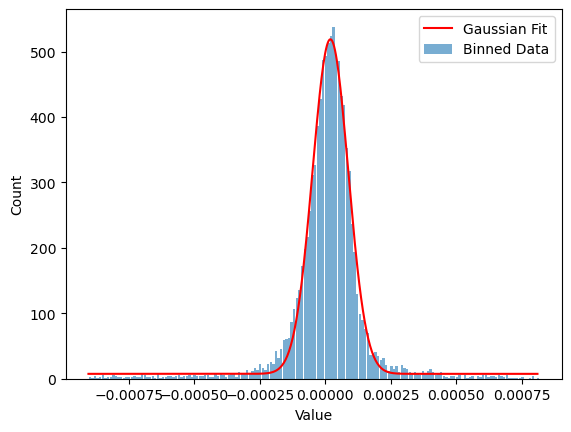

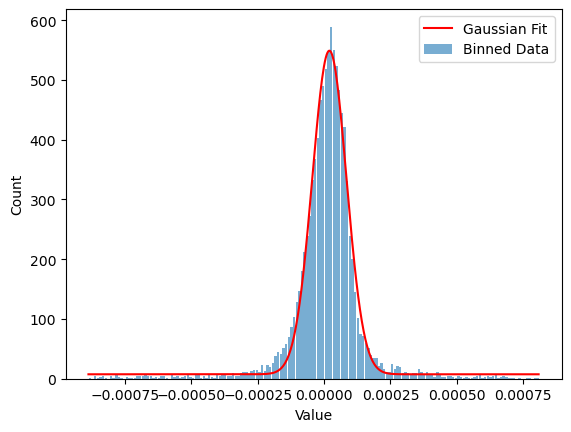

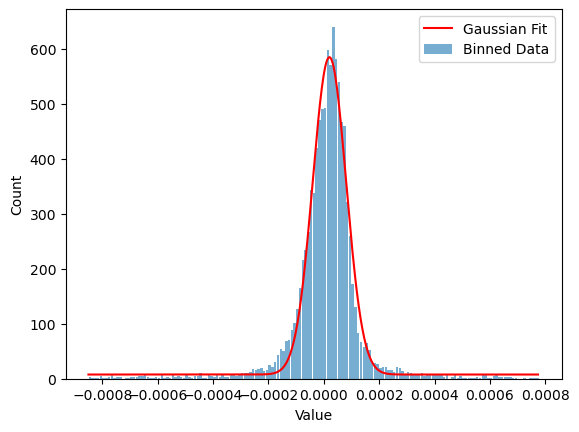

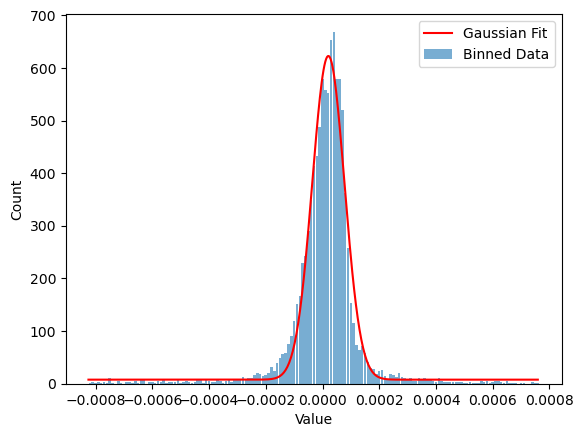

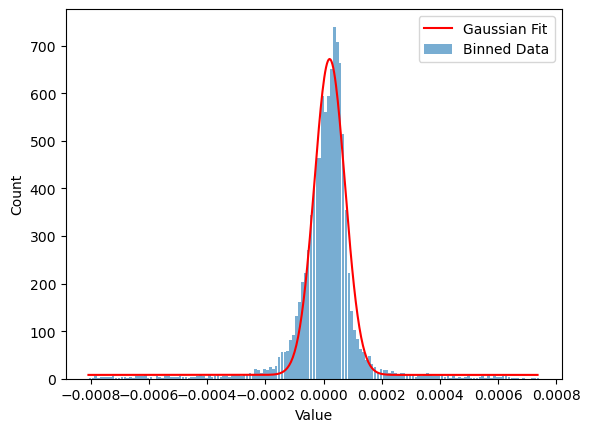

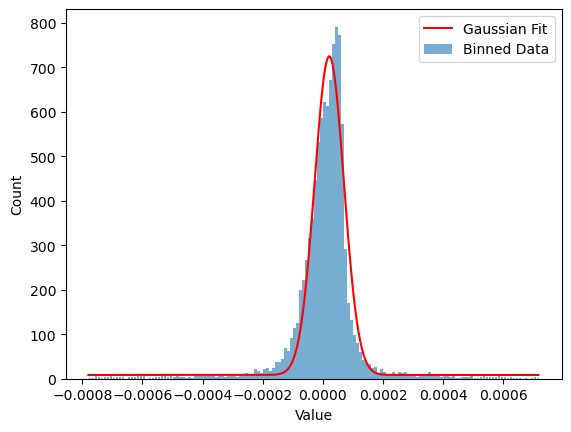

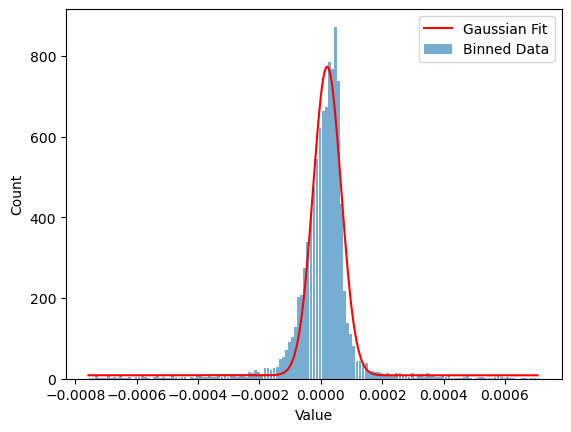

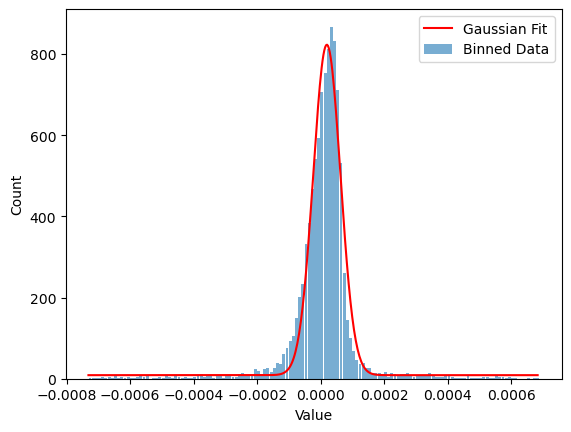

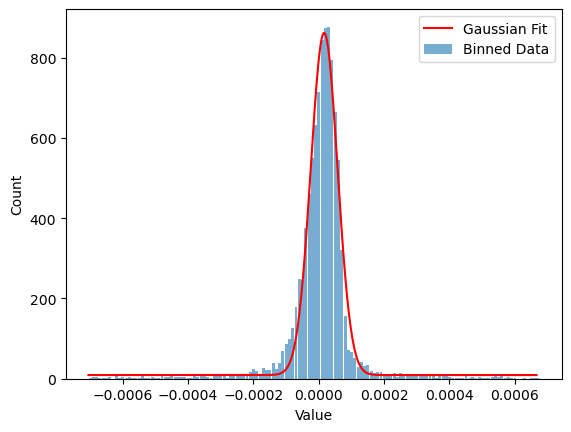

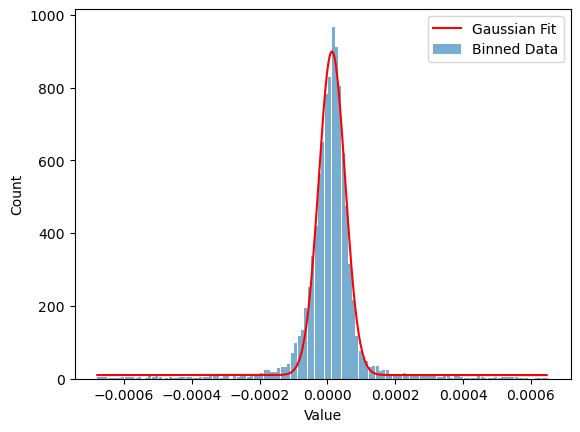

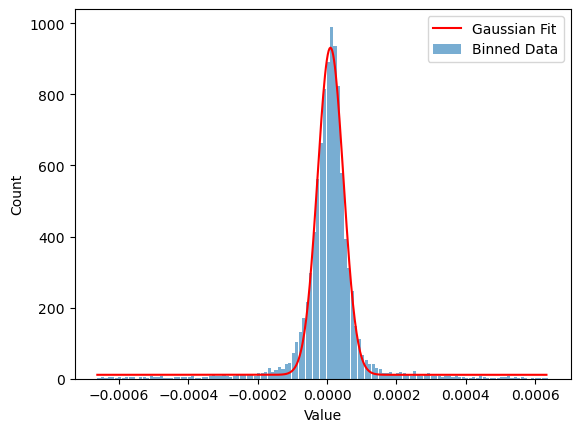

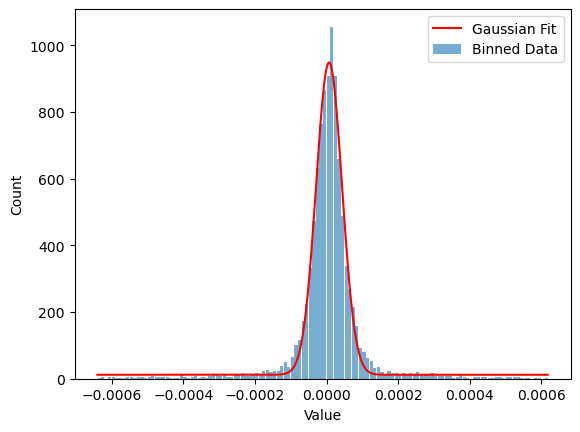

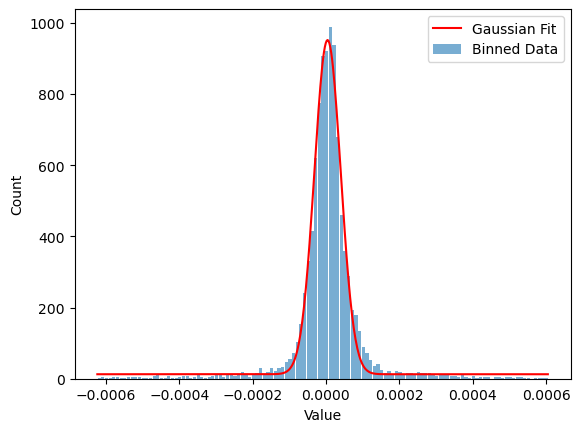

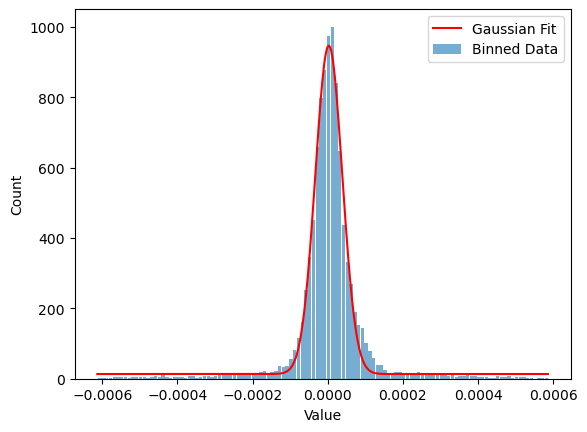

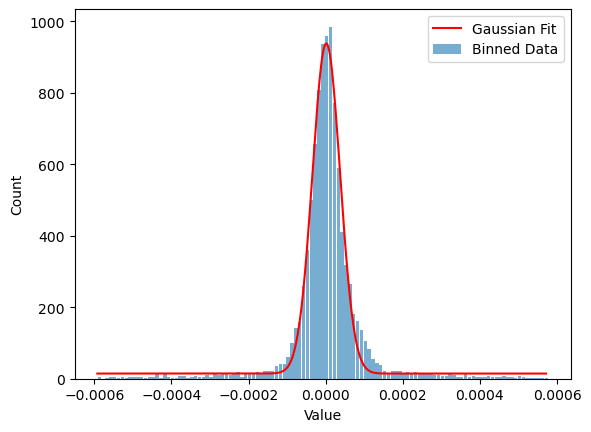

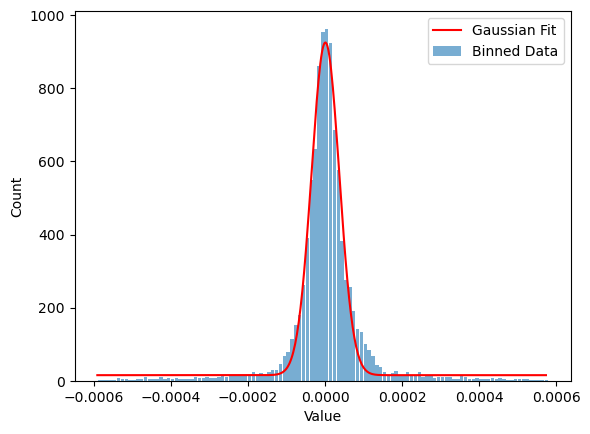

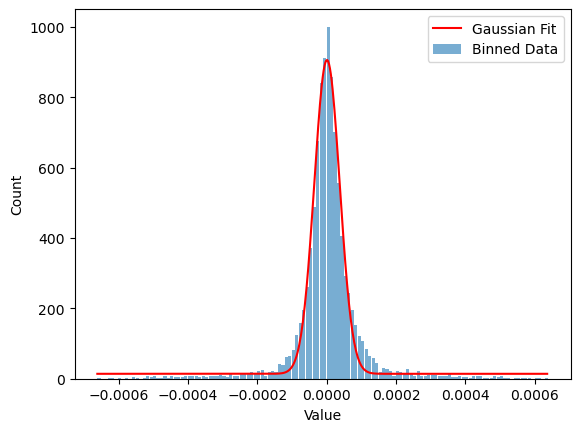

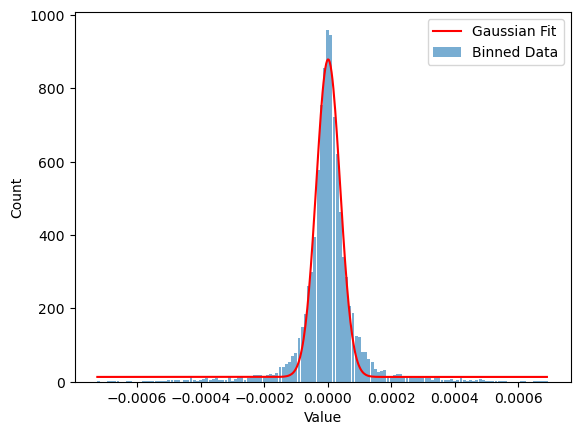

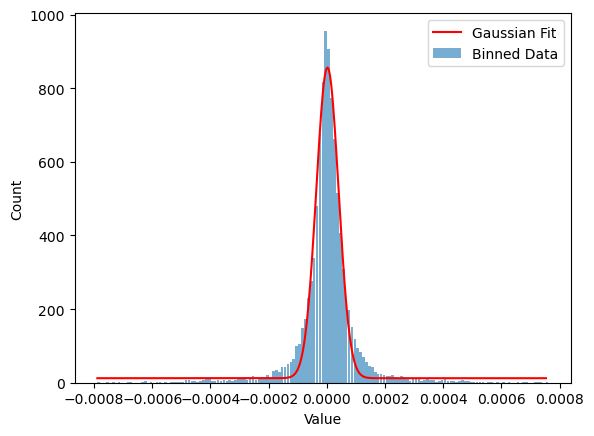

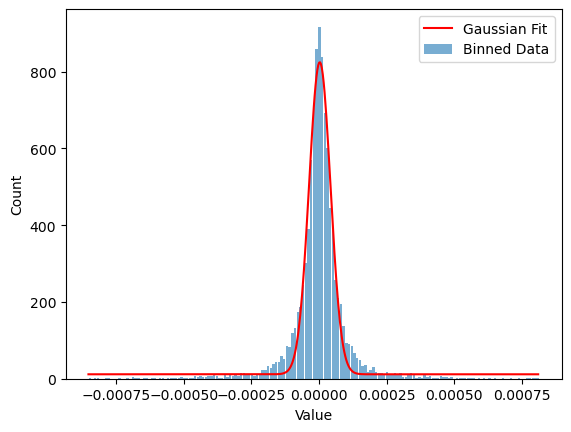

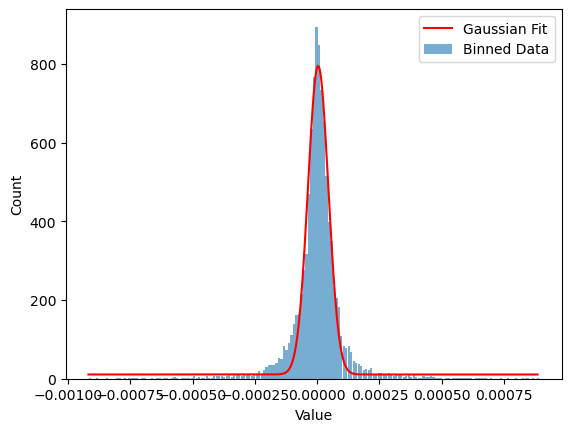

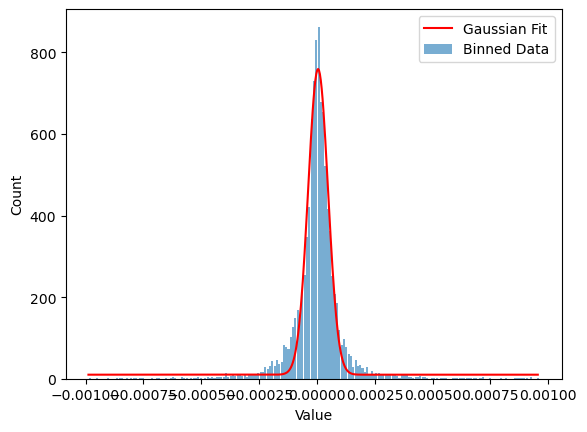

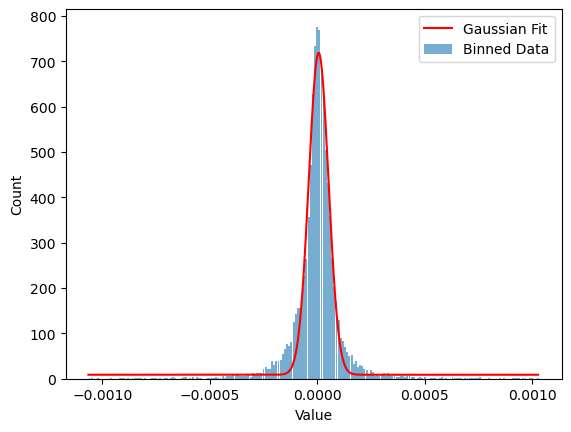

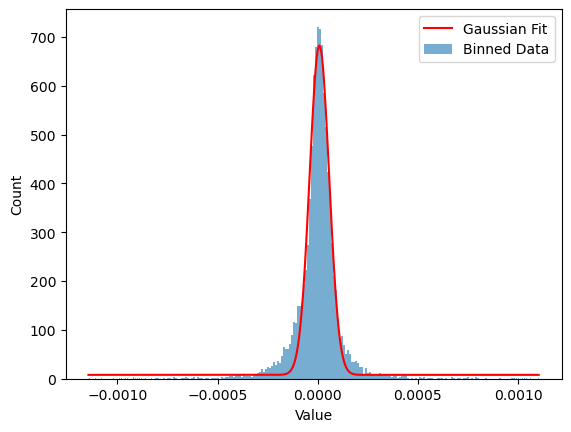

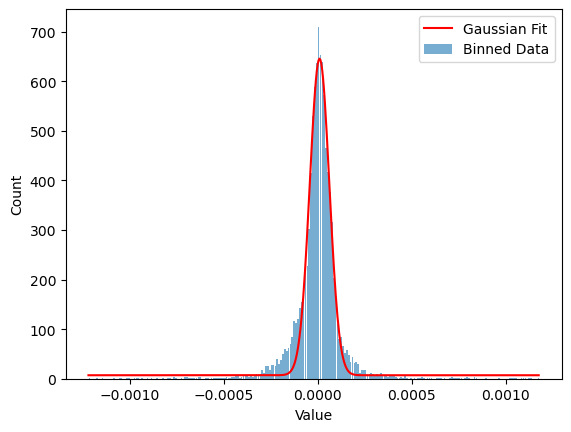

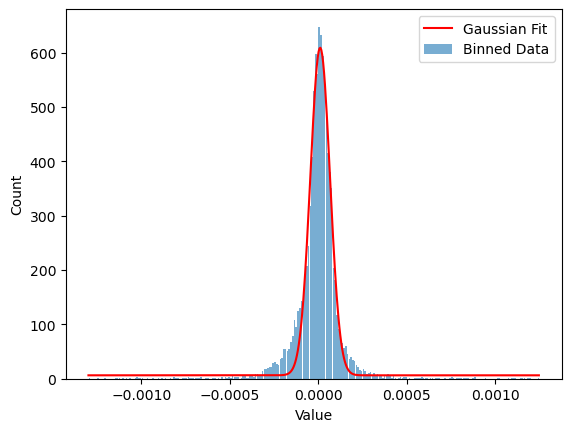

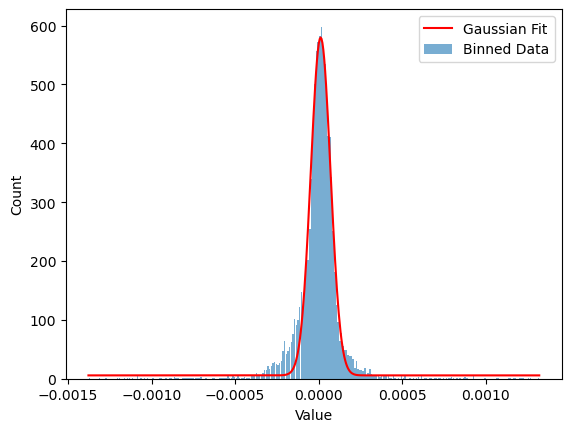

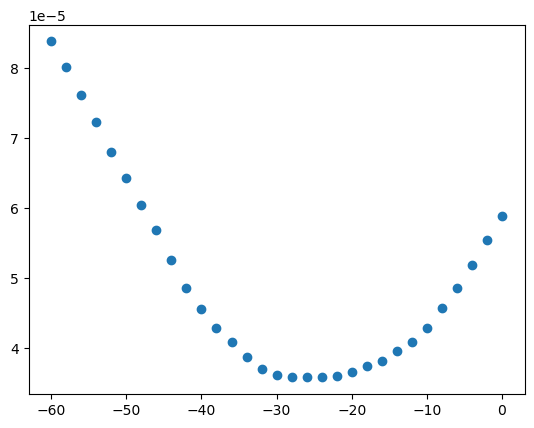

In [26]:
plt.clf() 
plt.scatter(
    [i["quadSetting"] for i in data],
    [fit_gaussian_to_binned_data( i["beam"]["x"], 10e-6, plot = True ) for i in data]
)

Like the smallestInterval version, also very much not a parabola

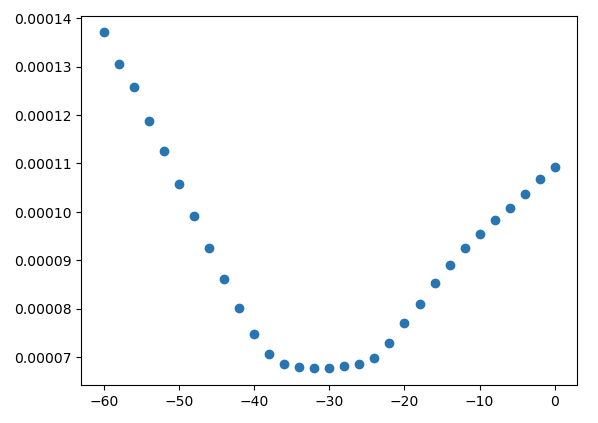